# 9.7 Exercises

## Exercise 5

We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

### Step (a)

> Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

In [6]:
set.seed(111)
x1 = runif(500) - 0.5
x2 = runif(500) - 0.5
y = 1 * (x1^2 - x2^2 > 0)

### Step (b)

> Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the x-axis, and $X_2$ on the yaxis.

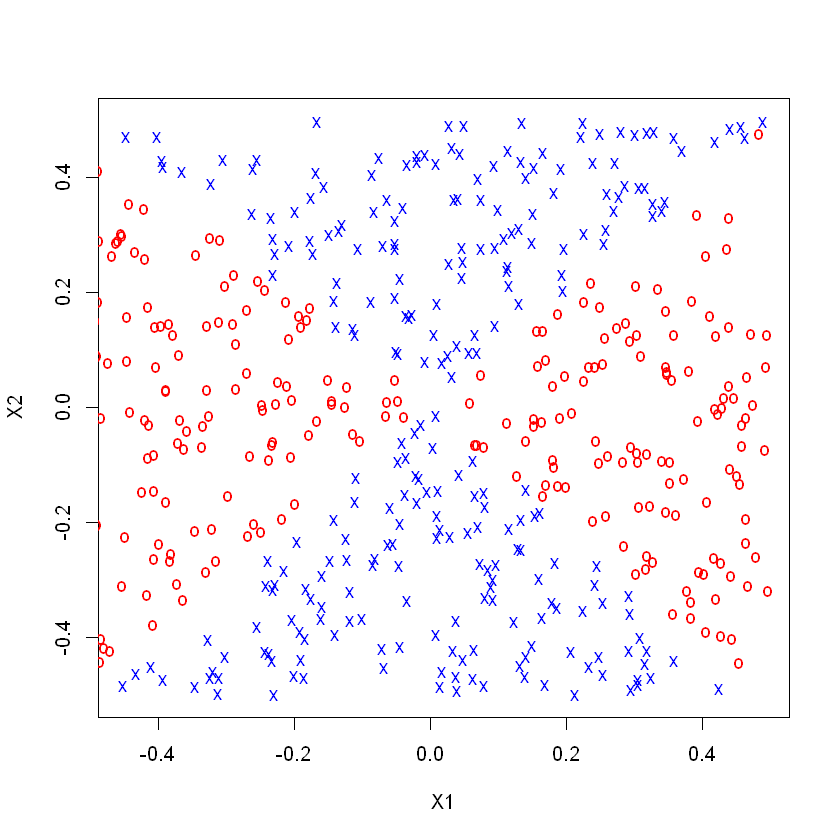

In [7]:
plot(x1[y == 0], x2[y == 0], col="blue", pch="x", xlab="X1", ylab="X2")
points(x1[y == 1], x2[y == 1], col="red", pch="o")

### Step (c)

> Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors

In [9]:
df = data.frame(x1 = x1, x2 = x2, y = y)
glm.fit = glm(y ~ x1 + x2, family=binomial)
summary(glm.fit)


Call:
glm(formula = y ~ x1 + x2, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.213  -1.133  -1.071   1.216   1.314  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.11154    0.08982  -1.242    0.214
x1          -0.25618    0.32240  -0.795    0.427
x2          -0.16569    0.31492  -0.526    0.599

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 691.58  on 499  degrees of freedom
Residual deviance: 690.66  on 497  degrees of freedom
AIC: 696.66

Number of Fisher Scoring iterations: 3


### Step (d)

> Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

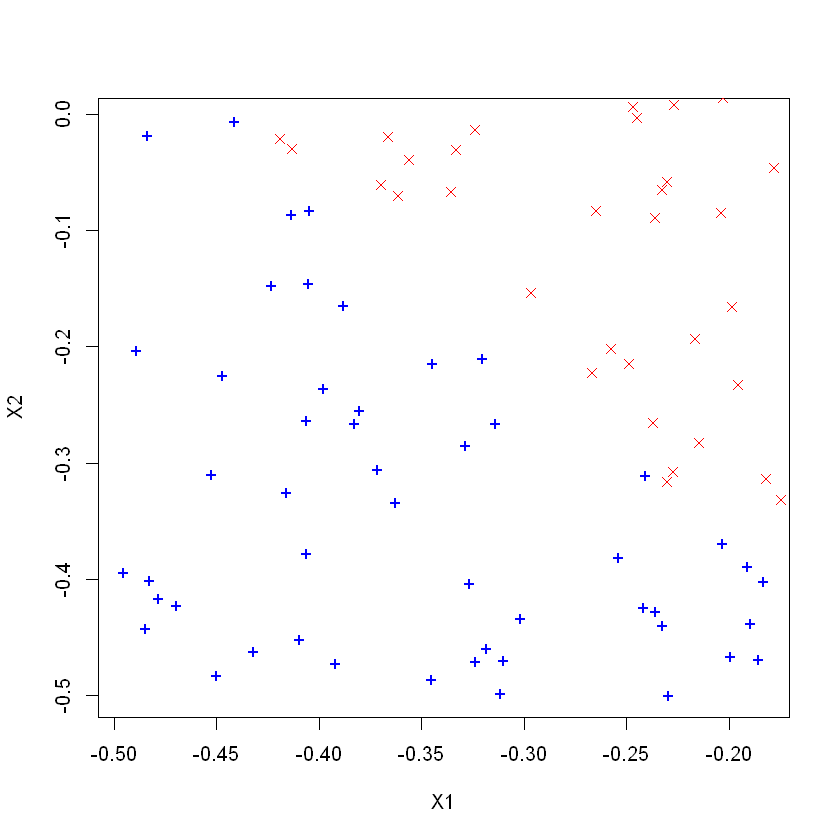

In [11]:
glm.probs = predict(glm.fit, df, type="response")
glm.preds = ifelse(glm.probs > 0.5, 1, 0)
df.pos = df[glm.preds == 1, ]
df.neg = df[glm.preds == 0, ]
plot(df.pos$x1, df.pos$x2, col="blue", xlab="X1", ylab="X2", pch="+")
points(df.neg$x1, df.neg$x2, col = "red", pch = 4)

In [5]:
table(glm.preds, df$y)
mean(glm.preds != df$y)

         
glm.preds   0   1
        0 241 209
        1  23  27

[1] 0.464

We can see that the decision boundary is linear despite majority of predictions belonging to positive class.

### Step (e)

> Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2$, $X_1X_2$, $log(X_2)$, and so forth).

In [12]:
glm.fit = glm(y~ poly(x1, 2) + poly(x2, 2) + I(x1*x2), data=df, family = binomial)
summary(glm.fit)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = y ~ poly(x1, 2) + poly(x2, 2) + I(x1 * x2), family = binomial, 
    data = df)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.003964   0.000000   0.000000   0.000000   0.007275  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)     -432.8     5246.7  -0.082    0.934
poly(x1, 2)1    3511.6    49461.6   0.071    0.943
poly(x1, 2)2  102642.6  1228358.8   0.084    0.933
poly(x2, 2)1   11665.3   142497.3   0.082    0.935
poly(x2, 2)2 -109808.8  1314287.4  -0.084    0.933
I(x1 * x2)     -2494.1    31569.3  -0.079    0.937

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9158e+02  on 499  degrees of freedom
Residual deviance: 8.8719e-05  on 494  degrees of freedom
AIC: 12

Number of Fisher Scoring iterations: 25


### Step (f)

> Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

In [13]:
glm.probs = predict(glm.fit, type="response")
glm.pred = ifelse(glm.probs > 0.5, 1, 0)
table(glm.pred)
mean(glm.pred != df$y)

glm.pred
  0   1 
264 236 

[1] 0

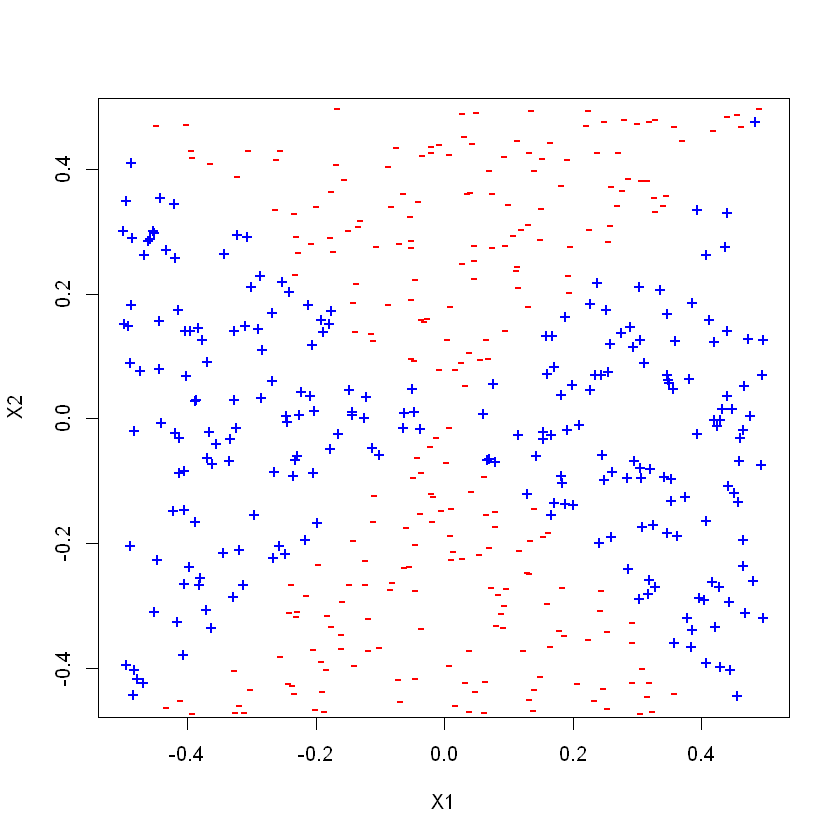

In [14]:
df.pos = df[glm.pred == 1, ]
df.neg = df[glm.pred == 0, ]
plot(df.pos$x1, df.pos$x2, col="blue", xlab="X1", ylab="X2", pch="+")
points(df.neg$x1, df.neg$x2, col="red", pch="-")

We can see that the logistic regression with quadratic terms makes very well predictions and fits the data well with training error rate 0.

### Step (g)

> Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

In [ ]:
library(e1071)
svm.fit = svm(as.factor(y) ~ x1 + x2, data=df, kernel="linear", cost=0.1)
plot(svm.fit, data=df)

We can observe that the linear kernel fails to find the non-linear decision boundary.

### Step (h)

> Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

In [ ]:
svm.fit.rad = svm(as.factor(y) ~ x1 + x2, data=df, kernel="radial", gamma=1, cost=0.1)
plot(svm.fit.rad, data=df)

The plot above shows that the SVM model with radial kernel outperforms the linear since the true data is not linearly separable and is polynomial.

## Exercise 6

At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate this claim.

### Step (a)

> Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.

In [ ]:
set.seed(3154)
x1 = runif(500, 1, 10)
x2 = runif(500, -4, 3)
y = ifelse(3*x1 - 4*x2 - 20 > 0, 1, 0)
df = data.frame(x1=x1, x2=x2, y=as.factor(y))
plot(df$x1, df$x2, col=as.integer(df$y) + 1, main="data set", xlab="X1", ylab="X2")

Above, we randomly generate 500 points. We have added artificially the decision boundary **3x-4y-20=0**

### Step (b)

> Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?

In [ ]:
library(e1071)
cost.grid = c(0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 10000)
svm.cv = tune(svm, as.factor(y) ~ ., data=df, kernel="linear", ranges=list(cost=cost.grid))
summary(svm.cv)

### Step (c)

> Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?

## Exercise 7

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

### Step (a)

> Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [ ]:
library(ISLR)
attach(Auto)

In [ ]:
Auto$mpgbin = ifelse(Auto$mpg>median(Auto$mpg), 1, 0)
Auto$mpgbin = as.factor(Auto$mpgbin)

### Step (b)

> Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

In [ ]:
library(e1071)
set.seed(111)
cost.grid = c(0.01, 0.03, 0.1, 0.3, 1, 3, 10)
svm.cv.lin = tune(svm, mpgbin ~ ., data=Auto, kernel="linear", ranges=list(cost=cost.grid))
summary(svm.cv.lin)

We can observe that the best result is with cost value of 1 which produces the lowest training error.

### Step (c)

> Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

In [ ]:
cost.grid = c(0.01, 0.03, 0.1, 0.3, 1, 3, 10)
gamma.grid = c(1, 3, 5, 7)
svm.cv.rad = tune(svm, mpgbin ~ ., data=Auto, kernel="radial", ranges=list(cost=cost.grid, gamma=gamma.grid))
summary(svm.cv.rad)

In [ ]:
deg.grid = c(2,3,4)
svm.cv.poly = tune(svm, mpgbin ~ ., data=Auto, kernel="polynomial", ranges=list(cost=cost.grid, degree=deg.grid))
summary(svm.cv.poly)

Based on our results, we can observe that radial kernel with gamma 1 and cost 1 is performing very well on our dataset, while the polynomial svm while choosing degree two, doesn't generate good training results.

### Step (d)

> Make some plots to back up your assertions in (b) and (c).

*Hint: In the lab, we used the `plot()` function for `svm` objects only in cases with p = 2. When p > 2, you can use the `plot()` function to create plots displaying pairs of variables at a time. Essentially, instead of typing `plot(svmfit, dat)` where `svmfit` contains your fitted model and `dat` is a data frame containing your data, you can type `plot(svmfit , dat , x1∼x4)` in order to plot just the first and fourth variables. However, you must replace `x1` and `x4` with the correct variable names. To find out more, type `?plot.svm`.*

We will us the best parameters chosen by cross validation for both svm radial kernel and polynomial to plot the results. We will use the best models from the previous step.

In [ ]:
plotpairs = function(model) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpgbin", "name"))]) {
        plot(model, Auto, as.formula(paste("mpg~", name, sep="")))
    }
}

In [ ]:
plotpairs(svm.cv.rad$best.model)

In [ ]:
plotpairs(svm.cv.poly$best.model)